# Subber

In [1]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
        return measures

In [5]:
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
circ = makeCirc(4, 1)

0100
Current state:  2
Init state array:  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
circ.crx(-pi/2, 2, 3)
circ.cx(1, 2)
circ.csx(1, 3)
circ.cx(0, 2)
circ.csx(0, 3)
circ.csx(2, 3)
circ.i(1)

for i in range(0, 4):
    circ.measure(i, i)

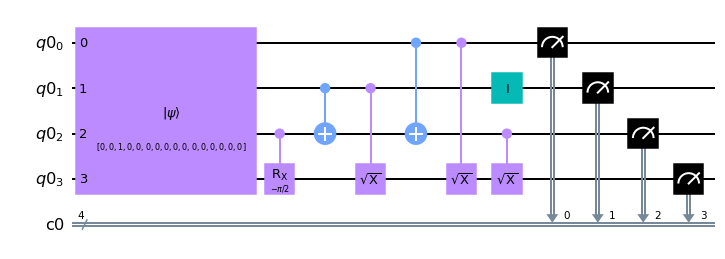

In [8]:
circ.draw()

In [9]:
getMeasure(circ, 1)[0][::-1]

'0111'

In [10]:
circ = QuantumCircuit(4)
circ.crx(-pi/2, 2, 3)
circ.cx(1, 2)
circ.csx(1, 3)
circ.cx(0, 2)
circ.csx(0, 3)
circ.csx(2, 3)

In [11]:
subber = circ.to_gate(label=' Subber')

In [12]:
circ2 = QuantumCircuit(8)
circ2.append(subber, [0, 1, 2, 3])

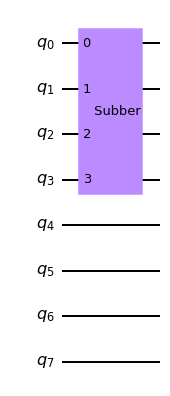

In [13]:
circ2.draw();